In [24]:
#Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Get the dataset
data_or = pd.read_csv("cars.csv")
data_or.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


# By analysing the data please find answers to following questions - 
## 1.Can you find that there is improvement in mpg over the years ?
## 2.Does cubicinches of a vehicle affects the vehicles time to reach 60 Miles per hour?
## 3.Does a specific country prefer vehicles with more horse power ?
## 4.How does the horse power affects the average of the vehicle ?
## 5.How does the cubic inches affects the average of the vehicle ?
## 6.What is the effect of number of cylinders on the mpg ?
## 7.What relation between cubic inches , number of cylinders and horse power you can observe from the data ? 
## 8.How much proportion of the total records is occupied by vehicles with 8 cylinders ?

In [26]:
#Look at the statistical features of the data
data_or.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [27]:
#Look at variales in data
data_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [ ]:
weightlbs

In [28]:
#Changing the column names
data_or.columns = ["mpg","cylinders","cubicinches","hp","weightlbs","time-to-60","year","brand"]
data_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [31]:
#Data without year variable
data_wo_year = data_or.drop("year",axis=1)

In [32]:
data_wo_year.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,brand
0,14.0,8,350,165,4209,12,US.
1,31.9,4,89,71,1925,14,Europe.
2,17.0,8,302,140,3449,11,US.
3,15.0,8,400,150,3761,10,US.
4,30.5,4,98,63,2051,17,US.


In [33]:
data_wo_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   brand        261 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 14.4+ KB


In [34]:
#Converting cubicinches and weightlbs to numeric 
data_wo_year.replace({" ":0}, inplace = True)
data_wo_year['cubicinches'] = pd.to_numeric(data_wo_year['cubicinches'])
data_wo_year['weightlbs'] = pd.to_numeric(data_wo_year['weightlbs'])
data_wo_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    int64  
 5   time-to-60   261 non-null    int64  
 6   brand        261 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 14.4+ KB


In [8]:
data_wo_year.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,brand
0,14.0,8,350,165,4209,12,US.
1,31.9,4,89,71,1925,14,Europe.
2,17.0,8,302,140,3449,11,US.
3,15.0,8,400,150,3761,10,US.
4,30.5,4,98,63,2051,17,US.


# Can you find that there is improvement in mpg over the years ?

In [9]:
#Can you find that there is improvement in mpg over the years ?
yearwise_df = data_or[["mpg","year"]]
yearwise_df.head()

,mpg,year
0,14.0,1972
1,31.9,1980
2,17.0,1971
3,15.0,1971
4,30.5,1978


In [10]:
yearwise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     261 non-null    float64
 1   year    261 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [11]:
yearwise_df.describe()

,mpg,year
count,261.000000,261.000000
mean,23.144828,1976.819923
std,7.823570,3.637696
min,10.000000,1971.000000
25%,16.900000,1974.000000
50%,22.000000,1977.000000
75%,28.800000,1980.000000
max,46.600000,1983.000000


In [12]:
yearwise_df.year.value_counts()

1974    35
1977    26
1971    23
1976    22
1980    21
1979    21
1978    18
1982    18
1981    18
1983    16
1973    16
1972    15
1975    12
Name: year, dtype: int64

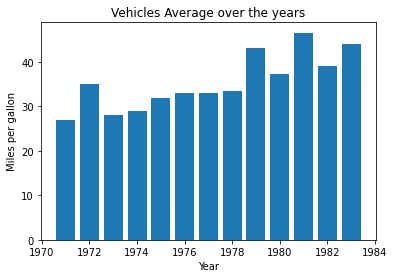

In [13]:
plt.bar(yearwise_df.year, yearwise_df.mpg)
plt.xlabel("Year")
plt.ylabel("Miles per gallon")
plt.title("Vehicles Average over the years")
plt.show()

By looking at the above analysis certainly there is gradual improvement in the mpg over the years.

# Does cubicinches of a vehicle affects the vehicles time to reach 60 Miles per hour?

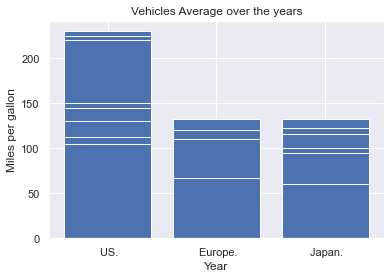

In [35]:
plt.bar(data_wo_year.brand, data_wo_year.hp)
plt.xlabel("Year")
plt.ylabel("Miles per gallon")
plt.title("Vehicles Average over the years")
plt.show()

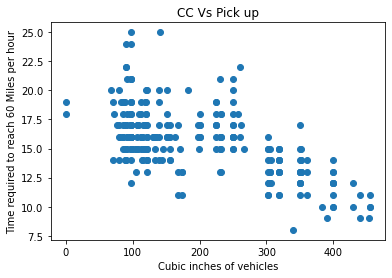

In [14]:
# Does cubicinches of a vehicle affects the vehicles time to reach 60 Miles per hour?
plt.scatter(data_wo_year.cubicinches , data_wo_year["time-to-60"])
plt.xlabel("Cubic inches of vehicles")
plt.ylabel("Time required to reach 60 Miles per hour")
plt.title("CC Vs Pick up")
plt.show()

From the analysis it is clear that certainly cubicinches affects the time required to reach 60 Mph for a vehicle.
It varries in indirect proportion. So if cc is more time taken by vehicle to reach 60 mph is less and vice versa.

# Does a specific country prefer vehicles with more horse power ?

<AxesSubplot:ylabel='hp'>

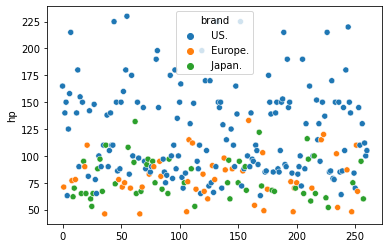

In [15]:
#Does a specific country prefer vehicles with more horse power ?

sns.scatterplot(x = data_wo_year.index ,y = data_wo_year.hp , hue = data_wo_year.brand )

From the analysis it seems that US vehicles mostly are with higher Horse power as compared to Europe and Japan.

# How does the horse power affects the average of the vehicle ?

<AxesSubplot:xlabel='mpg', ylabel='hp'>

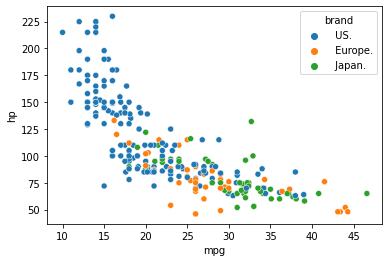

In [16]:
# How does the horse power affects the average of the vehicle ?

sns.scatterplot(x = data_wo_year.mpg ,y = data_wo_year.hp , hue = data_wo_year.brand )

It is evident that horse power is in inverse proportion with Average of the vehicle. As the one goes on 
increasing the other one drops.

# How does the cubic inches affects the average of the vehicle ?

<AxesSubplot:xlabel='mpg', ylabel='cubicinches'>

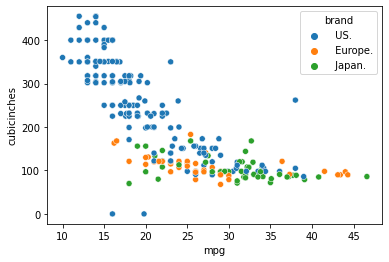

In [17]:
# How does the cubic inches affects the average of the vehicle ?

sns.scatterplot(x = data_wo_year.mpg ,y = data_wo_year.cubicinches , hue = data_wo_year.brand )

It is evident that cubicinches is in inverse proportion with Average of the vehicle. As the one goes on 
increasing the other one drops.

# What is the effect of number of cylinders on the mpg ?

<AxesSubplot:xlabel='mpg', ylabel='cylinders'>

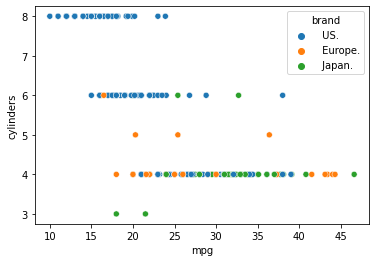

In [18]:
# What is the effect of number of cylinders on the mpg ?

sns.scatterplot(x = data_wo_year.mpg ,y = data_wo_year.cylinders , hue = data_wo_year.brand )

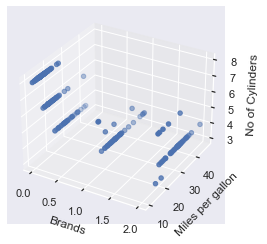

In [19]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")
%matplotlib inline

# Creating figure
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

data_3d = data_wo_year.replace({" US.":0," Europe.":1," Japan.":2})

x = data_3d['brand']
y = data_3d['mpg']
z = data_3d['cylinders']

ax.set_xlabel("Brands")
ax.set_ylabel("Miles per gallon")
ax.set_zlabel("No of Cylinders")

ax.scatter(x, y, z)

plt.show()

It is evident that number of cylinders is in inverse proportion with Average of the vehicle. As the one goes on 
increasing the other one drops.

# What relation between cubic inches , number of cylinders and horse power you can observe from the data ? 

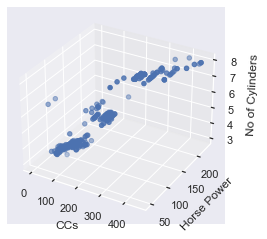

In [20]:
# What relation between cubic inches , number of cylinders and horse power you can observe from the data ? 

sns.set(style = "darkgrid")
%matplotlib inline

# Creating figure
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = data_3d['cubicinches']
y = data_3d['hp']
z = data_3d['cylinders']

ax.set_xlabel("CCs")
ax.set_ylabel("Horse Power")
ax.set_zlabel("No of Cylinders")

ax.scatter(x, y, z)

plt.show()

<AxesSubplot:xlabel='cubicinches', ylabel='hp'>

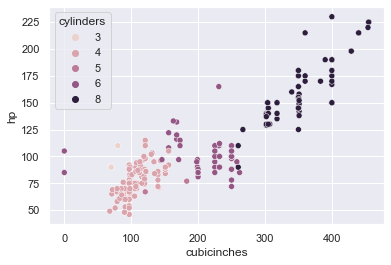

In [21]:
sns.scatterplot(x = data_wo_year.cubicinches ,y = data_wo_year.hp , hue = data_wo_year.cylinders )

It is evident that cubic inches , number of cylinders and horse power are in direct proportion with each other.

# How much proportion of the total records is occupied by vehicles with 8 cylinders ?

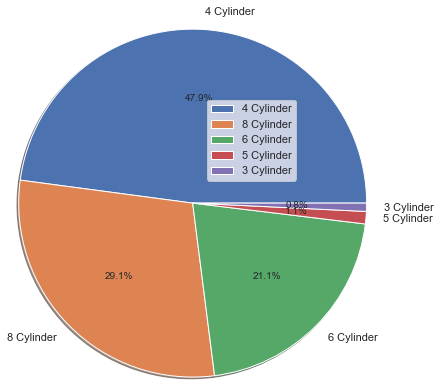

In [22]:
# How much proportion of the total records is occupied by vehicles with 8 cylinders ?

plt.pie(data_wo_year.cylinders.value_counts(),labels = ["4 Cylinder","8 Cylinder","6 Cylinder","5 Cylinder","3 Cylinder"],autopct='%1.1f%%',shadow = True,radius= 2)
plt.legend(loc = "upper right")

In [23]:
data_wo_year.cylinders.value_counts()

4    125
8     76
6     55
5      3
3      2
Name: cylinders, dtype: int64

Roughly around 30 % of the vehicles enlisted in the data are with 8 Cylinders.